In [1]:
import sys
import os
import pprint as pp
import pandas as pd
import numpy as np
import math
from collections import defaultdict, Counter
import os
import glob
import xlrd

import itertools
import re
from dateutil import tz
from datetime import datetime

from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import matplotlib as plt
import seaborn as plt

# Stats
import scipy.stats as stats
from numpy.random import binomial

%matplotlib inline

# Display settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('max_columns',350)
pd.set_option('max_info_columns', 350)
pd.options.mode.chained_assignment = None # Prevents error message from showing for copy/slices of dataframes

In [ ]:
# if assessment_protocol_errors.select_dtypes(include=[bool]).size:
#     assessment_protocol_errors[assessment_protocol_errors.select_dtypes(include=[bool]).columns] = assessment_protocol_errors.select_dtypes(include=[bool]).astype(int)

### Read in Data

In [13]:
assessment_protocol_errors = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Assessment_Protocol_Errors-Table.csv')
print("Assessment Protocol Errors")
assessment_protocol_errors.shape
assessment_protocol_errors.sample(15)

assessment = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Assessment-Table.csv')
print("Assessment")
assessment.shape
assessment.sample(15)

case_event = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Case_Event_Map-Table.csv')
print("Case Event Map")
case_event.shape
case_event.sample(15)

chw = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/chw-Table.csv')
print("CHW Table")
chw.shape
chw.sample(15)

mm_raw_data = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Data_From_MUSO_MedicMobile_20180308.csv')
print("Raw from Muso")
mm_raw_data.shape
mm_raw_data.sample(15)

patient_case = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Patient_Case-Table.csv')
print("Patient Case Table")
patient_case.shape
patient_case.sample(15)

patient = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Patient-Table.csv')
print("Patient")
patient.shape
patient.sample(15)

treatment_fu = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Treatment_Follow_Up-Table.csv')
print("Treatment Follow Up")
treatment_fu.shape
treatment_fu.sample(15)

Assessment Protocol Errors


(55404, 30)

,assessment_uuid,chw,chw_area,formname,has_protocol_errors,number_of_protocol_errors,act_based_combination_without_positive_tdr,acute_respiratory_infection_without_24h_follow_up,acute_respiratory_infection_without_48h_follow_up,acute_respiratory_infection_without_5_day_follow_up,amoxicillin_without_pneumonia,danger_signs_without_referral,diarrhea_without_5day_follow_up,diarrhea_without_ors,diarrhea_without_zinc,fever_without_tdr,incorrect_dosage_of_act_based_combination,incorrect_dosage_of_albendazole,incorrect_dosage_of_amoxicillin,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,malaria_without_24h_follow_up,malaria_without_48h_follow_up,malaria_without_72h_follow_up,muac_yellow_no_malnutrition_follow_up,pneumonia_without_amoxicillin,severe_diarrhea_without_referral,symptoms_of_malaria_without_tdr,reported
22878,76C32F2D-D5AD-7C63-BE9C-37D154918048,a7f09f1a-28f2-4afa-85b8-9d8bf918bafa,a8ea9701-1873-4025-9c9f-f9d1a1fc48db,patient_assessment,True,4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,2017-09-28 08:39:40.878
2569,E57365E9-11B2-19AA-9371-31125DB55D14,1913dc08-58ca-4077-938c-8f75084d3bee,fe2c0329-3861-4ab2-a522-9e2ba233ecc5,patient_assessment,True,4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,2017-07-05 19:24:32.581
33082,65F1DE60-2C68-A451-B508-E196F92E2B7D,5ba0b402-23c3-405b-90d1-bc776c212e54,28777c39-4bb8-45d0-bce6-6f8260e6e47e,patient_assessment,True,4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,2017-07-06 08:41:14.998
48907,7E4113D4-4BDF-98EC-8FCE-9872BFBC28C9,4a38375c-a83a-405a-9074-23a32ae15c6a,a0f3f5c1-3513-429b-8cf3-5647896856bf,patient_assessment,True,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,2017-10-23 10:57:09.599
43039,B3149CD9-44C9-CA74-B398-0AD9EEF16B5A,cc278bb4-2fc5-42c8-ba4e-bcc338275d73,43c8262b-56fc-4123-a32d-0533b010c29b,patient_assessment,True,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,2018-01-31 18:15:59.69
36095,4093F043-ED9C-009E-8CA7-EBD8A840AA7F,5410fe0e-ea9c-4c25-9657-10a33f1ee26f,19308624-1786-4609-8679-7829b9fee713,patient_assessment,True,7,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,2017-07-14 09:04:30.832
47421,0FCB9EC2-C178-BF14-9E69-59083E9BA608,852b7879-a095-46dc-8c88-35742df99700,74c1e563-bec7-413f-af55-817875123b46,patient_assessment,True,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,2017-11-16 12:00:38.8
981,A7ECF733-E62F-AC09-9C14-B059970D3852,6e604fcd-ca0a-4896-b426-5b87596419c9,7d304760-a842-4809-9016-031c033f4726,patient_assessment,True,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2017-03-03 21:45:32.123
42236,54FD5D3B-7D35-541D-97CF-C43995CE222C,fda753c1c37ef32fba0138a4c7946a28,3bbdd822-eee7-44ad-baf5-966efc5cc026,patient_assessment,True,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2018-02-21 15:43:07.811
19206,D274D4B0-AC68-3386-A396-6B181315443B,1c2246ca-2e74-4e13-805a-96568c56cf18,f4b38290-de9f-4c39-8b23-4d8ad25c36c3,patient_assessment,True,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,2017-06-01 13:30:04.963


Assessment


(55400, 66)

,case_id,chw_id,chw_parent_id,patient_id,reported,how_child_found,when_assessed,when_illness_began,acc_danger_sign_seizure,acc_danger_sign_loss_of_consiousness,acc_danger_sign_unable_to_drink_or_breastfeed,acc_danger_sign_disorientation_or_confusion,acc_danger_sign_vomits_everything,acc_danger_sign_chest_indrawing,acc_danger_sign_wheezing,acc_danger_sign_bleeding_that_does_not_stop,acc_danger_sign_lathargy,ref_danger_sign_severe_jaundice,ref_danger_sign_dark_colored_urine,ref_danger_sign_child_is_sick,ref_danger_sign_conjunctival_pallor,ref_danger_sign_red_shakir_strip,ref_danger_sign_not_gaining_weight,ref_danger_sign_eodema_lower_legs,ref_danger_sign_diarrhea_more_than_14_days,ref_danger_sign_other_diseases_newborn,ref_danger_sign_cough_more_than_14_days,ref_danger_sign_blood_in_stools,temperature,temperature_retake,respiration_rate,notion_of_fever,vomiting,sluggish,chills,lose_of_appetite,cough,stools_exceed_3_per_day,tdr_done,tdr_result,acc_tdr_not_done,ref_tdr_not_done,malaria_tdr_not_done,accompany_to_cscom,refer_to_cscom,treat_malaria,malaria_give_act,malaria_act_dosage,malaria_not_give_act,treat_diarrhea,diarrhea_did_you_give_zinc,diarrhea_zinc_dosage,diarrhea_why_not_give_zinc,diarrhea_why_not_give_zinc_other,diarrhea_did_you_give_ors,diarrhea_why_not_give_ors,diarrhea_why_not_give_ors_other,treat_ari,ari_receive_honey,ari_receive_eucalyptus,ari_receive_lemon,ari_give_amox,ari_give_amox_dosage,ari_not_give_amox,ari_not_give_amox_other,nutri_color_shakir
38206,D2C32D37-83FA-4719-A8D1-65F7428985E5,852b7879-a095-46dc-8c88-35742df99700,74c1e563-bec7-413f-af55-817875123b46,45a592dc-3cf5-4695-b559-9678e4906771,2017-10-24 07:28:22+00,accompanied_by_parents,c_assessment_time_1,c_when_illness_3,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,tdr_unavailable,NaN,False,True,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40999,E6E42F65-4CAD-5351-8592-EAD36FFDBE4F,327921c4-1948-4fc2-ac1a-23bbca2de7f2,0301418a-5658-48f5-bae6-1e42922e9e6c,66ed02ac-07ad-4df8-b292-1824d75994cd,2017-11-16 11:05:46+00,home_visit,c_assessment_time_1,c_when_illness_1,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,36.5,NaN,38.0,yes,no,no,no,no,yes,no,yes,négatif,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,yes,no,no,NaN,NaN,NaN,NaN,Green
26087,8378990F-73E6-A15F-850D-5F9F3805936E,fda753c1c37ef32fba0138a4c79448ae,895aad23-1cef-4316-af81-9a7ba357f4d2,2F5D03B3-6032-F7CE-94B7-7D9D7BBDA809,2017-08-07 22:10:32+00,home_visit,c_assessment_time_4,c_when_illness_1,no,no,no,no,no,no,no,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,négatif,NaN,NaN,NaN,True,False,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39064,E1FD6010-D1F0-17D1-802D-1AABA4737EA5,4a38375c-a83a-405a-9074-23a32ae15c6a,a0f3f5c1-3513-429b-8cf3-5647896856bf,D59D0DE1-4404-81F3-B899-EE75B103F88A,2017-10-30 11:35:00+00,home_visit,c_assessment_time_1,c_when_illness_2,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,37.5,NaN,NaN,yes,yes,no,no,no,no,no,yes,positif,NaN,NaN,NaN,False,False,False,yes,2_tablets_act,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green
13599,FA1E5782-587E-90DD-BEF9-9F5032F42149,fe1de9e0-2a34-44bb-96e0-b1d559d4eb00,697b8214-38a0-4740-a812-f22d221dec50,3c01313c-71b1-40a6-87c6-51a276695ebb,2017-05-20 16:36:43+00,accompanied_by_parents,c_assessment_time_4,c_when_illness_1,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,négatif,NaN,NaN,NaN,False,True,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12956,1326AB95-1617-B318-BD16-7D80637DC3A5,62e87002-5fdc-41ae-b474-62baa9265e89,d9360dd2-cbe7-4f88-b558-1575199a0345,d07c59ae-c5ed-40ef-9772-d3239557bdc8,2017-05-15 16:05:17+00,accompanied_by_parents,c_assessment

Case Event Map


(37135, 4)

,case_id,fu_type,event_number,event_id
29470,6EA65EE6-F552-67A6-977D-B67FDC355578,referral,1,DBD7E4AD-7267-DF65-8635-13C2BD7B0968
21984,EE661763-817D-B1C4-A766-F99F4BBB22B4,treatment,2,260BCA70-855C-7497-9040-26837C63E157
27302,45A19188-71B5-B2BE-8F8E-DC2BCF23B09E,referral,1,BAA04A28-F428-FD91-A42B-A49EDC7B2AD8
12928,8DE7090B-BEA8-915D-97C4-48F76569F3C8,treatment,1,63259ECC-F58E-93D7-A241-57EC0A545E74
28313,58BB075A-7922-D6C5-A85A-30540AA0145C,referral,1,2FCA93AF-0AB3-0716-A98A-B508D919C57D
17141,BA0F90BC-7186-973A-8898-D107C019C02F,treatment,4,35DFDC48-9F5B-0320-98F1-BFA29FD4F820
12213,86A5647D-14BB-A36E-8E50-717A26215FC3,treatment,2,BAC65E38-9099-F96A-941D-678A0D0E9B03
964,0A8AA580-463E-B96A-854C-5B7A5EFCAE71,treatment,3,D73923F5-1042-07E8-98CE-B601C3CA1DAD
32177,A211B2BD-04CD-247E-9C17-D0C4E5049D2B,referral,1,DBC5A5FC-954C-7EE0-A64A-EA7D2537EAC9
15838,AD296096-AE55-15D1-8921-5682A7A44CAA,treatment,2,64E12741-58AC-2AD4-8498-E0AB8B8C62D4


CHW Table


(402, 5)

,chw_id,parent_id,with_errors,total_assessments,percent_without_errors
32,6d8fbc9e-8165-49fd-91b7-87ab10d847c9,5be8e1c2-006d-499b-9201-8b5d1722865d,212,234,9.40
9,db91e797f2ce030419456e90ab7970b0,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,19,41,53.66
290,fda753c1c37ef32fba0138a4c7c3def3,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,3,36,91.67
313,fda753c1c37ef32fba0138a4c7c2e428,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,7,32,78.12
137,e2fea372-ac83-440b-8c68-1d852a2201a9,2a3ab855-1ec0-40f1-adf6-e4d889a45ac1,80,107,25.23
284,db91e797f2ce030419456e90ab77277e,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,49,75,34.67
25,db91e797f2ce030419456e90ab78b01d,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,12,16,25.00
184,db91e797f2ce030419456e90ab79fb69,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,11,17,35.29
214,db91e797f2ce030419456e90ab78fc51,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,24,80,70.00
396,a1125214-75a0-49f5-80a3-b7f9b204c0eb,74a7f78eef4f8baa9de4e11cd2a4c032,197,437,54.92


Raw from Muso


/Users/veenakumar/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (24,32,35,52,94,97,100,112,124,126,142,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(27470, 167)

,CensusID,village,menage,SexeFinal,AgeAnFinal,LDP,concession,Var_103,var_104,var_105,var_105_1,var_106,var_106_1,var_107,var_130,var_131,var_131_1,var_142,var_143,var_800,var_801,var_802,var_803,var_803_1,var_803_2,var_401,var_402,var_403,var_404,var_405,var_405_1,var_406,var_406_1,var_500,var_501,var_502,var_502_1,var_502_2,var_502_3,var_502_4,var_502_5,var_502_6,var_502_7,var_502_8,var_502_9,var_502_10,var_502_88,var_502_99,var_503_1,var_503_2,var_503_3,var_503_autre_1,var_503_autre_2,var_504,var_505,var_509,var_516,var_516_1,var_516_2,var_516_3,var_516_4,var_516_5,var_516_6,var_516_7,var_516_8,var_516_9,var_516_10,var_516_11,var_516_88,var_516_99,var_600,var_601,var_602,var_603,var_603_1,var_603_2,var_603_3,var_603_4,var_603_5,var_603_6,var_603_7,var_603_8,var_603_9,var_603_10,var_603_88,var_603_99,var_604_1,var_604_2,var_604_3,var_604_4,var_605,var_609,var_700,var_700_b,autre_var_700_b,var_701,var_702,autre_var_702,var_703,autre_var_703,autre_var_703_2,var_704,var_715,var_715_1,var_715_2,var_715_3,var_715_4,var_715_5,var_715_6,var_715_88,var_715_99,var116a,var116autre,var116b,var116c,var116c1,var116c2,var116c3,var116c4,var116c5,var116c6,var116c7,var116c88,var116c99,autrev116c,var116d,autrevar116d,var117a,var117autre,var117b,var117c,var1188_1,var1188_2,var1188_3,var1188_4,var1188_5,var1188_6,var1188_7,var1188_88,var1188_99,var1188_10,var119,var119autre,var120,var120autre,var121_1,var121_2,var121_3,var121_4,var121_5,var121_6,var121_7,var122_1,var122_2,var122_3,var122_4,var122_5,var122_6,var123_1,var123_2,var124,var125,var126,var127,var128,var129,_merge
18618,17022608204,17,8,1,0.0,1.0,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,NaN,11.0,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,8.0,2.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,3
16279,17000501103,17,1,2,6.0,3.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,1.0,2.0,FAUX,VRAI,FAUX,FAUX,FAUX,FAUX,FAUX,FAUX,FAUX,NaN,1.0,NaN,22.0,NaN,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,8.0,NaN,34.0,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,5.0,4.0,5.0,4.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,3
18873,17024501103,17,1,1,13.0,3.0,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,1.0,2.0,FAUX,VRAI,FAUX,FAUX,FAUX,FAUX,FAUX,FAUX,FAUX,NaN,1.0,NaN,22.0,NaN,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,NaN,34.0,NaN,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,6.0,15.0,15.0,25.0,5.0,7.0,2.0,NaN,2.0,NaN,2.0,NaN,3
26456,17164801000,17,1,1,51.0,1.0,1648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Patient Case Table


(55400, 39)

,case_id,patient_id,chw_id,how_child_found,when_assessed,when_assessed_en,when_illness_began,when_illness_began_en,count_treatment_follow_ups,count_referral_follow_ups,treat_ari,treat_malaria,treat_diarrhea,accompany_to_cscom,refer_to_cscom,has_protocol_errors,act_based_combination_without_positive_tdr,acute_respiratory_infection_without_24h_follow_up,acute_respiratory_infection_without_48h_follow_up,acute_respiratory_infection_without_5_day_follow_up,amoxicillin_without_pneumonia,danger_signs_without_referral,diarrhea_without_5day_follow_up,diarrhea_without_ors,diarrhea_without_zinc,fever_without_tdr,incorrect_dosage_of_act_based_combination,incorrect_dosage_of_albendazole,incorrect_dosage_of_amoxicillin,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,malaria_without_24h_follow_up,malaria_without_48h_follow_up,malaria_without_72h_follow_up,muac_yellow_no_malnutrition_follow_up,pneumonia_without_amoxicillin,severe_diarrhea_without_referral,symptoms_of_malaria_without_tdr
3885,671CB06B-DC56-0D8C-AF4A-1A21492E6646,edc37256-3529-44d9-8b06-f11698f530a0,073dd9d4-be1c-461c-846d-5f72a24ed9a8,accompanied_by_parents,c_assessment_time_1,Morning,c_when_illness_8,More than three days ago,1,0,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3341,ADBFF702-3E63-3A13-B807-CECF7CB53F8B,34102396-caab-461f-8e95-b4317ce88666,3a482517-d237-4e1f-9dc6-26fa91651575,home_visit,c_assessment_time_1,Morning,c_when_illness_4,Yesterday morning,1,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
29072,D6982C7E-1D04-6A40-A6E8-10E53F11FF13,832a5d87-e330-4c50-bbe4-b5aaf74aa6fd,1fd03a0b-291b-4f37-a98e-d97bcf7d7358,accompanied_by_parents,c_assessment_time_1,Morning,c_when_illness_8,More than three days ago,0,0,True,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
46916,47626A34-AFFA-8475-9B55-C3A54948EFB7,020e1822-cb2b-4a97-b42d-f0e9726f6cc1,57ecf7ed-342c-4f16-8c67-cab063be9f6a,home_visit,c_assessment_time_4,Evening,c_when_illness_1,Today,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False
37923,5E173170-D39B-D674-BDCA-9D5D92117220,9F811482-EBC0-4033-A094-93BD0913A769,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,home_visit,c_assessment_time_1,Morning,c_when_illness_2,Last night,3,0,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40848,3F6FC8C3-F074-F018-9CBE-E47FC857FA02,718866FE-BF8D-8E64-ACD3-0E6EC3722A7D,bb1278b5-d612-4707-8e04-1c1d96c43953,home_visit,c_assessment_time_2,Noon,c_when_illness_4,Yesterday morning,0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30041,3C05D847-6A4A-BB2A-87FD-BDADBD226BEB,676b318d-a588-41c9-8f0b-5e7c6df91c84,99dc9d85-cd57-4fb3-9cb5-44c2c6580380,accompanied_by_parents,c_assessment_time_1,Morning,c_when_illness_2,Last night,1,0,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False
44249,9A19CB8D-1CB1-7CCA-B8BF-8267BA429118,b71a4da9-8842-472d-9233-34567cfc7afe,45004038-1df7-4741-a240-2c508430a161,accompanied_by_parents,c_assessment_time_3,Afternoon,c_when_illness_1,Today,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
4530,6EF811C1-4E3A-95E2-86AC-663C9820

Patient


(172030, 8)

,patient_id,family_id,chw_id,date_of_birth,sex,external_id,imported,reported
7337,709f031d-9b3b-4d06-9b94-4b5153d9f8bc,889a404d-771a-4dd0-86cc-e35db86fd62b,5a5b1351-39e3-499b-b413-35680bebbe31,1947-01-01,homme,06000802000,False,2016-11-11 00:40:47+00
112620,91b15827-4a1a-4ba5-aa44-98254c59ba83,6ebe6a9f-639a-4cbf-8352-d5f39e978f54,938c4998-c783-41e6-8b99-c78c4c388936,2009-04-28,Femme,59003601103,True,2017-02-26 19:32:40+00
111468,30ee9561-4c0a-4464-aa1c-5d50a7f70964,e0861e0c-1c2c-4d4e-ae57-ad8f81123dd6,cd4ed4c4-7054-4f4a-b854-2c7322798481,1986-12-31,Femme,57005202200,True,2017-02-26 19:22:53+00
1978,9d9e9383-c692-497c-ac95-f08eb62700f2,cd031083-857c-4b9c-8578-85dfd3222b0d,1e80f0b6-209e-475e-8d81-0918996c1a60,2014-01-01,femme,02004303102,False,2016-11-10 22:55:41+00
97948,413e2cdc-f336-478e-996f-a0e8512c54ba,ac44055a-3070-4e96-af93-2496712d70b5,3a482517-d237-4e1f-9dc6-26fa91651575,2004-09-28,Homme,91020002002,True,2017-02-25 21:02:45+00
66910,6371a2fa-3ce2-4c24-bcd0-b78bad40cbf6,c83f6de3-9a05-4269-9b26-bda28d105872,8e7fd007-ce60-4725-a149-2c4a1e64bb04,1971-12-31,Femme,19003601100,True,2017-02-25 09:37:04+00
47971,0dcb6eee-9108-429a-b2c5-46d90027662c,9eb8d47e-374c-4571-88ca-e30225fe9738,f1ad16ae-7cfc-4187-a5b3-7f2436fb5c2c,1985-12-31,Femme,45007901100,True,2017-02-25 03:10:23+00
13372,2bd01ceb-a5a9-494d-ba1c-d64c66eadbb4,698fa449-d22c-4de5-9582-7b3b11fdd8c9,b91b1d05-9900-4ed5-9678-c03311b3d9e9,2003-01-01,homme,13003621106,False,2016-11-11 19:00:36+00
150973,1478272D-BC36-2927-99E2-5E4DC4AF9FFD,D358007C-BBDE-721A-812D-BE9DC86291DF,c797d5af-2d1a-4502-9a21-5fff005cd4fb,1957-02-08,homme,NaN,False,2018-02-08 13:10:27+00
152361,17015413-2EA4-52D9-A01A-D2062098BA92,07DC4AE6-CC06-9097-A028-0CA8EF96C4E5,bb1278b5-d612-4707-8e04-1c1d96c43953,2012-02-13,homme,NaN,False,2018-02-13 21:03:07+00


Treatment Follow Up


/Users/veenakumar/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(23561, 33)

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,treat_for_ari,under_observation,child_temperature,child_temperature_retake,respiration_rate,child_taking_act,child_morning_act,child_evening_act,act_not_given,child_taking_amox,amox_not_given,child_taking_zinc,zinc_not_given,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
8315,5BBCF6C0-2BCB-C392-997F-FC2798E19985,3,FA84DA0A-42A1-420B-AD70-9A30FEFDA082,aac1a13d-067a-496d-a343-d63d58025236,996d62cd-37b4-4149-9878-321a835a6bea,923b6c09-fc94-4de2-b885-fcb64a9f139b,2017-04-21 17:05:45+00,follow_up,False,True,False,NaN,36.7,NaN,NaN,yes,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cured,no,False,NaN,NaN,NaN,3,malaria
11566,7F246A21-3961-1564-B22B-161EF180713D,3,2C6EFF5D-BF61-226F-B125-5AFB4DBB0493,327921c4-1948-4fc2-ac1a-23bbca2de7f2,0301418a-5658-48f5-bae6-1e42922e9e6c,826768F2-1664-4B88-A53C-3C00A807763C,2017-07-15 08:33:54+00,follow_up,False,False,True,NaN,37.3,NaN,38.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,3,ari
14181,9AF69B8E-092C-FB07-A42E-BCE9968FD0C6,1,442FF3D4-6FB0-C0D2-BF4C-7ACA20D9DA2B,bc318dff-b49d-4298-9ea3-65d47311f14a,344d4913-e64a-4634-877f-7d25c9b2f039,8dd023d0-8ab7-4418-bfa3-f5cd729bb0b9,2017-03-03 22:12:53+00,follow_up,False,True,False,NaN,35.7,NaN,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,2,malaria
6383,46071FF3-C7DB-F543-B4AA-6B85DD2A2BFE,3,B920E626-BD46-9CFB-9FE4-EC3F7C3C7A3F,db91e797f2ce030419456e90ab797b4b,cec5bf93-a794-4ca4-928f-466a165bd7b0,D4E8ED63-578E-66A2-B587-6051412C7445,2017-06-15 07:24:28+00,follow_up,False,False,True,NaN,37.0,NaN,35.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,3,ari
4436,2FE20DB4-1BA4-089A-A89E-8BCB4DFBA0CA,1,2B13341B-5F8B-0F87-9F4F-3E141522407C,b62995b3-9560-4319-a62d-f73cc27d69b8,036cfe95-0969-40b9-9d5a-1dce21761833,4715E841-045C-032E-87D6-29640C23F09A,2017-08-26 09:55:02+00,follow_up,False,False,True,NaN,37.3,NaN,38.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,2,ari
7137,4EA46B62-6752-C4DD-8447-A47378904B3F,1,085D3D0D-4331-39C3-AC7C-C918EEF53280,7de5c82d-cf11-472e-b8a7-7d517d25df82,672c58ae-5339-420f-98d4-b773d2c24cfc,b3c46168-8274-4e24-84b2-19d5712240ba,2017-03-07 10:29:36+00,follow_up,True,False,False,NaN,36.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cured,no,True,NaN,NaN,NaN,1,referral
22579,F4A8A885-39D7-7BE8-B9B6-C6CDFF4F4CF9,3,A33B94D0-AE36-CC04-ABAF-704D05B30885,ca3f9b53-653e-496b-b6a5-f162bb7989f7,f9fb2381-fbea-4646-97fe-65575358853c,bb7a77e3-691b-4211-9d55-902655c86f62,2018-02-08 18:49:58+00,follow_up,False,False,True,NaN,36.6,NaN,28.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,3,ari
58,00DD684B-3094-5130-A9C7-68CD5B01CBA4,3,55FBD419-9000-9714-9125-1C6FC288185D,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,AE016866-2BE4-5998-8104-09C386BB3E32,2017-07-06 12:18:10+00,follow_up,False,False,True,NaN,36.4,NaN,38.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,3,ari
15314,A7414BEC-DF65-E4E8-BD87-A5D0E1E79EF0,4,C7E55A26-3B2C-3475-B4DF-01E5BF9CF18C,aac1a13d-067a-496d-a343-d63d58025236,996d62cd-37b4-4149-9878-321a835a6bea,406d6473-b6d0-4b5a-a0eb-734765021428,2017-03-31 07:55:21+00,follow_up,False,False,True,NaN,36.8,NaN,28.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,cured,no,False,NaN,NaN,NaN,4,ari
12571,8A56A626-43BC-FF36-AE41-9F2A2ED5E486,1,5C033E48-6661-87AA-92C9-CFD263CA8C36,db91e797f2ce030419456e90ab7ad878,09195c07-20a5-4e4c-a37e-99b7f3b90784,79B1BD74-7250-3895-9063-C8E45482CA55,2017-07-10 15:51:34+00,close_out,True,False,False,NaN,35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,refusal_of_parent,NaN,NaN,1,referral


### Initial EDA

In [38]:
case_event['event_number'] = case_event['event_number'].astype(str)

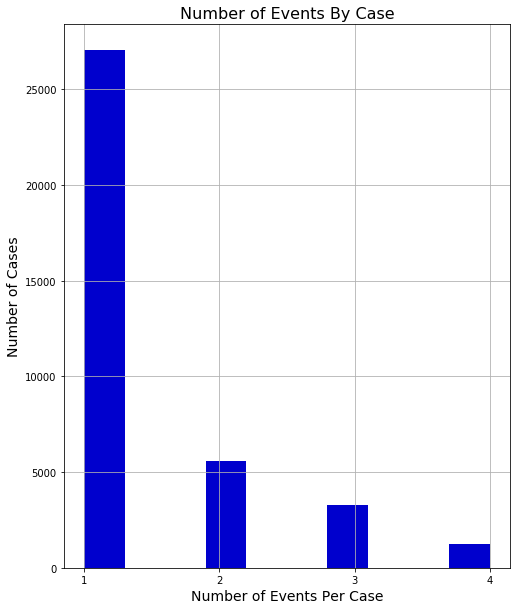

In [39]:
# case_event.groupby(['case_id'])['event_id'].count()
x = case_event['event_number'].hist(figsize=(8, 10), color='mediumblue' )
x.set_xlabel("Number of Events Per Case", fontdict={'fontsize': 14})
x.set_ylabel("Number of Cases", fontdict={'fontsize': 14})
x.set_title("Number of Events By Case", fontdict={'fontsize': 16});

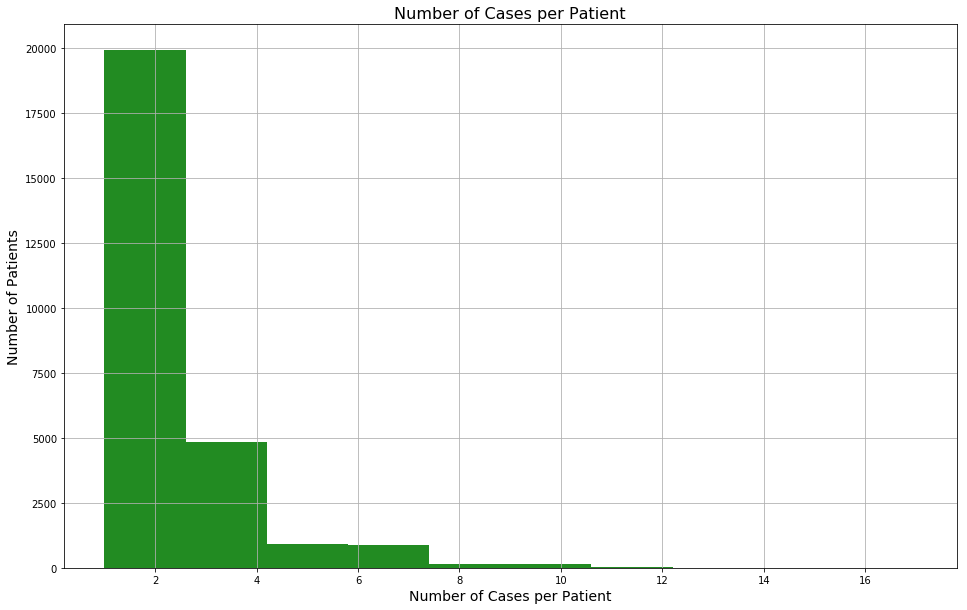

In [56]:
a = assessment.reset_index().groupby(['patient_id'])['case_id'].count().hist(figsize=(16, 10), color='forestgreen')
a.set_xlabel("Number of Cases per Patient", fontdict={'fontsize': 14})
a.set_ylabel("Number of Patients", fontdict={'fontsize': 14})
a.set_title("Number of Cases per Patient", fontdict={'fontsize': 16});

In [50]:
assessment.reset_index().groupby(['patient_id'])['case_id'].count().describe()

count    26906.000000
mean         2.058983
std          1.594981
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         17.000000
Name: case_id, dtype: float64

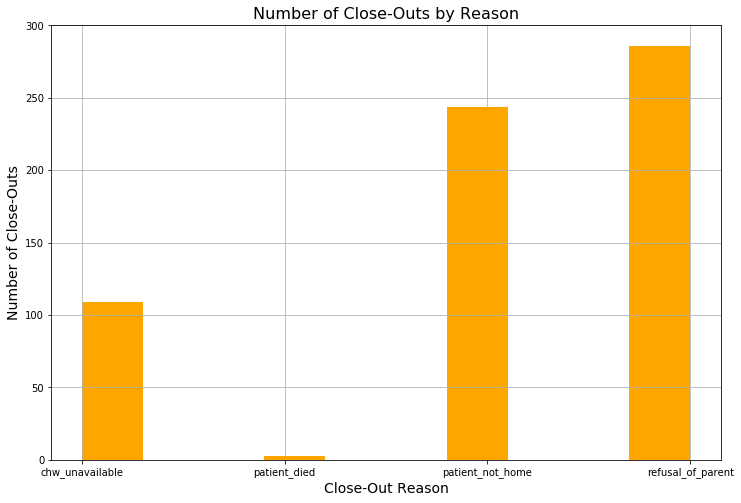

In [41]:
closed_out = treatment_fu[treatment_fu['close_out'] == True]
c = closed_out['why_close_out'].hist(figsize=(12, 8), color='orange' )
c.set_xlabel("Close-Out Reason", fontdict={'fontsize': 14})
c.set_ylabel("Number of Close-Outs", fontdict={'fontsize': 14})
c.set_title("Number of Close-Outs by Reason", fontdict={'fontsize': 16});

In [42]:
closed_out['why_close_out'].value_counts()

refusal_of_parent    286
patient_not_home     244
chw_unavailable      109
patient_died           3
Name: why_close_out, dtype: int64

In [44]:
sum(treatment_fu['close_out'] == True)

1503

### Drilldown

assessment_protocol_errors  
assessment  
case_event  
chw  
mm_raw_data  
patient_case  
patient  
treatment_fu  

In [14]:
assessment_protocol_errors = assessment_protocol_errors.set_index('assessment_uuid')
assessment = assessment.set_index('case_id')

In [81]:
assessment.drop(['reported'], axis=1, inplace=True)

In [82]:
assessment_protocol_errors['reported'] = pd.to_datetime(assessment_protocol_errors['reported'])

In [83]:
assessment_with_protocol_errors = pd.concat([assessment_protocol_errors, assessment], axis=1)
assessment_with_protocol_errors

,chw,chw_area,formname,has_protocol_errors,number_of_protocol_errors,act_based_combination_without_positive_tdr,acute_respiratory_infection_without_24h_follow_up,acute_respiratory_infection_without_48h_follow_up,acute_respiratory_infection_without_5_day_follow_up,amoxicillin_without_pneumonia,danger_signs_without_referral,diarrhea_without_5day_follow_up,diarrhea_without_ors,diarrhea_without_zinc,fever_without_tdr,incorrect_dosage_of_act_based_combination,incorrect_dosage_of_albendazole,incorrect_dosage_of_amoxicillin,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,malaria_without_24h_follow_up,malaria_without_48h_follow_up,malaria_without_72h_follow_up,muac_yellow_no_malnutrition_follow_up,pneumonia_without_amoxicillin,severe_diarrhea_without_referral,symptoms_of_malaria_without_tdr,reported,chw_id,chw_parent_id,patient_id,how_child_found,when_assessed,when_illness_began,acc_danger_sign_seizure,acc_danger_sign_loss_of_consiousness,acc_danger_sign_unable_to_drink_or_breastfeed,acc_danger_sign_disorientation_or_confusion,acc_danger_sign_vomits_everything,acc_danger_sign_chest_indrawing,acc_danger_sign_wheezing,acc_danger_sign_bleeding_that_does_not_stop,acc_danger_sign_lathargy,ref_danger_sign_severe_jaundice,ref_danger_sign_dark_colored_urine,ref_danger_sign_child_is_sick,ref_danger_sign_conjunctival_pallor,ref_danger_sign_red_shakir_strip,ref_danger_sign_not_gaining_weight,ref_danger_sign_eodema_lower_legs,ref_danger_sign_diarrhea_more_than_14_days,ref_danger_sign_other_diseases_newborn,ref_danger_sign_cough_more_than_14_days,ref_danger_sign_blood_in_stools,temperature,temperature_retake,respiration_rate,notion_of_fever,vomiting,sluggish,chills,lose_of_appetite,cough,stools_exceed_3_per_day,tdr_done,tdr_result,acc_tdr_not_done,ref_tdr_not_done,malaria_tdr_not_done,accompany_to_cscom,refer_to_cscom,treat_malaria,malaria_give_act,malaria_act_dosage,malaria_not_give_act,treat_diarrhea,diarrhea_did_you_give_zinc,diarrhea_zinc_dosage,diarrhea_why_not_give_zinc,diarrhea_why_not_give_zinc_other,diarrhea_did_you_give_ors,diarrhea_why_not_give_ors,diarrhea_why_not_give_ors_other,treat_ari,ari_receive_honey,ari_receive_eucalyptus,ari_receive_lemon,ari_give_amox,ari_give_amox_dosage,ari_not_give_amox,ari_not_give_amox_other,nutri_color_shakir
00010E48-93CD-0F3B-8E76-DDA4F6A0E804,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,patient_assessment,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2017-10-02 09:02:22.250,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,home_visit,c_assessment_time_1,c_when_illness_5,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,36.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,tdr_unavailable,NaN,False,True,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00022FBF-A5B0-9649-861D-E5CCE1C4A427,62e87002-5fdc-41ae-b474-62baa9265e89,d9360dd2-cbe7-4f88-b558-1575199a0345,patient_assessment,True,6,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,2017-04-26 07:36:10.087,62e87002-5fdc-41ae-b474-62baa9265e89,d9360dd2-cbe7-4f88-b558-1575199a0345,84c4e0a2-0a54-499d-93c1-c641662233f4,accompanied_by_parents,c_assessment_time_1,c_when_illness_7,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,36.80,NaN,46.0,no,no,no,no,yes,yes,no,yes,negative,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,yes,10_ml_amox,NaN,NaN,Green
000264B5-5124-9A3E-9038-EADF76D3DFA5,c27a0584-b106-469e-b0b7-538b72fd1bb4,0beaced5-f358-4412-a644-5c9d67b2df23,patient_assessment,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2017-09-21 09:45:40.16

In [96]:
assessment_with_protocol_errors['year_reported'] = assessment_with_protocol_errors['reported'].apply(lambda x: x.year)
assessment_with_protocol_errors[assessment_with_protocol_errors['year_reported'] != 2017]['year_reported'].value_counts()

2018    7912
2014     175
2010      93
2016      22
2015       5
2013       5
2007       4
1970       3
2009       3
2008       1
Name: year_reported, dtype: int64